In [1]:
import pandas as pd
import numpy as np
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0)
print(df_obj)
#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0))
print(df_obj.min(axis=1))

cloth         a         b         c         d
size                                         
0      1.478008 -0.523507 -0.069625  0.302051
1      0.765490  0.930204 -1.995908 -0.281693
2     -1.114618 -0.900265  2.065842  0.020848
cloth         a         b         c         d
size                                         
0      1.478008       NaN -0.069625  0.302051
1      0.765490  0.930204 -1.995908 -0.281693
2     -1.114618 -0.900265  2.065842  0.020848
--------------------------------------------------
cloth
a   -1.114618
b   -0.900265
c   -1.995908
d   -0.281693
dtype: float64
size
0   -0.069625
1   -1.995908
2   -1.114618
dtype: float64


In [4]:
df_obj

cloth,a,b,c,d
size,,,,
0,-0.285646,NaN,-0.713710,0.304523
1,0.112133,1.952359,0.384927,0.335535
2,-1.038265,0.997715,1.404310,-0.607043


In [5]:
#观察数据分布的一种 非常常用方法
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean  -0.403926  1.475037  0.358509  0.011005
std    0.584248  0.675035  1.059257  0.535470
min   -1.038265  0.997715 -0.713710 -0.607043
25%   -0.661955  1.236376 -0.164391 -0.151260
50%   -0.285646  1.475037  0.384927  0.304523
75%   -0.086756  1.713698  0.894619  0.320029
max    0.112133  1.952359  1.404310  0.335535


In [3]:
df_obj.loc[:,'c']

size
0   -0.069625
1   -1.995908
2    2.065842
Name: c, dtype: float64

In [5]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax的对象只能是series，不能是df
print(type(df_obj.loc[:,'c'].argmin()))

1
<class 'numpy.int64'>


In [6]:
df_obj

cloth,a,b,c,d
size,,,,
0,1.478008,NaN,-0.069625,0.302051
1,0.765490,0.930204,-1.995908,-0.281693
2,-1.114618,-0.900265,2.065842,0.020848


In [7]:
#返回的是一个series
#计算最小值或者最大值的索引值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    2
b    2
c    1
d    1
dtype: int64

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #查看数据的信息
print('-'*50)
df.head() #查看数值类型的数据的信息



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
--------------------------------------------------


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 任务：统计这1000部电影有多少导演和演员

In [12]:

# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)
# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique())) #推荐这种方式

--------------------------------------------------
644
644


In [11]:
# # 获取演员的人数 #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()
print(temp_actors_list)


[['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'], ['Noomi Rapace', 'Logan Marshall-Green', 'Michael Fassbender', 'Charlize Theron'], ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu Richardson', 'Jessica Sula'], ['Matthew McConaughey,Reese Witherspoon', 'Seth MacFarlane', 'Scarlett Johansson'], ['Will Smith', 'Jared Leto', 'Margot Robbie', 'Viola Davis'], ['Matt Damon', 'Tian Jing', 'Willem Dafoe', 'Andy Lau'], ['Ryan Gosling', 'Emma Stone', 'Rosemarie DeWitt', 'J.K. Simmons'], ['Essie Davis', 'Andrea Riseborough', 'Julian Barratt,Kenneth Branagh'], ['Charlie Hunnam', 'Robert Pattinson', 'Sienna Miller', 'Tom Holland'], ['Jennifer Lawrence', 'Chris Pratt', 'Michael Sheen,Laurence Fishburne'], ['Eddie Redmayne', 'Katherine Waterston', 'Alison Sudol,Dan Fogler'], ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe,Kevin Costner'], ['Felicity Jones', 'Diego Luna', 'Alan Tudyk', 'Donnie Yen'], ["Auli'i Cravalho", 'Dwayne Johnson', 'Rachel House', 'Temuera Morrison'], ['Anne 

In [14]:
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(actors_num) #演员的数量

2015


In [15]:
#想知道每个演员出演的电影数量
u,indices = np.unique(actors_list,return_counts = True)
print (u)
print(indices)
print(type(indices))
print(type(u))

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']
[1 1 1 ... 1 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 8.3.1 电影时长的关系

66 191
125
--------------------------------------------------


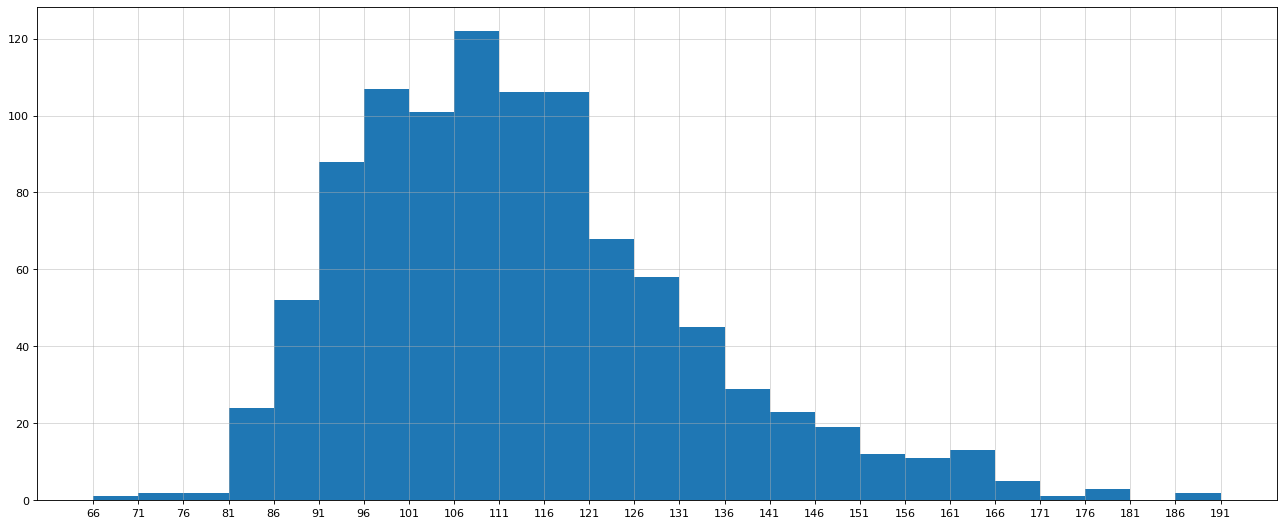

In [16]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [17]:
#电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.723199999999999
<class 'numpy.ndarray'>
--------------------------------------------------
9.0 1.9


最大评分减去最小评分为7.1
组数为14.0


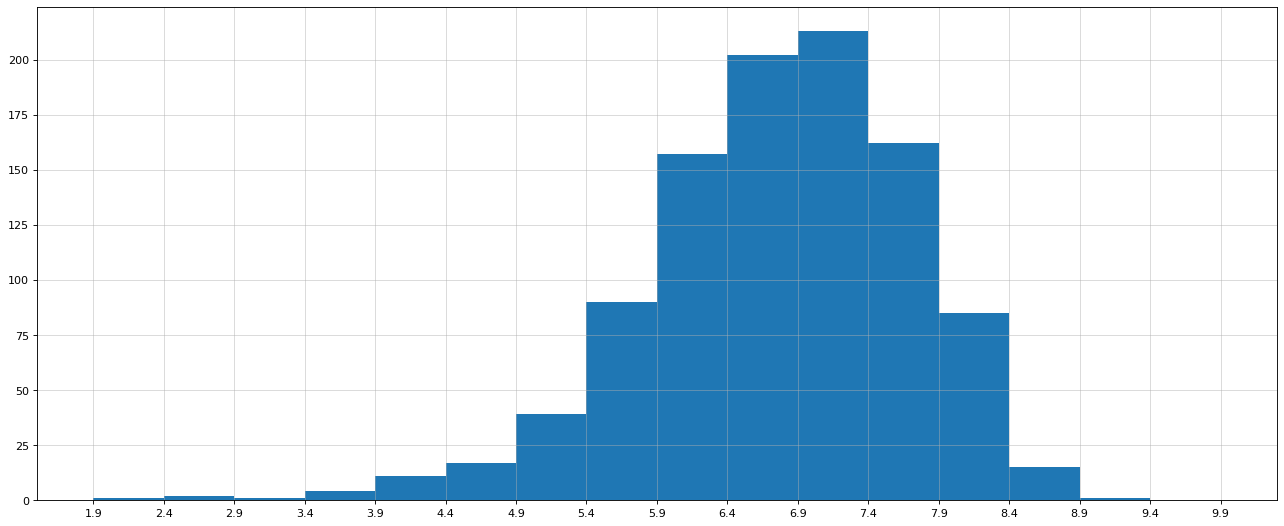

In [18]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5  #对不齐的原因是因为9.0-1.9不能整除0.5

print(f'组数为{num_bin}')
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.hist(runtime_data, bins=_x)
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表

plt.xticks(_x) #设置x轴的刻度

plt.show()

### 8.3.3 导演要拍什么题材电影

In [4]:


print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object


In [8]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20个题材类型
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

20
     Biography  Fantasy  Romance  Animation  Musical  Drama  Mystery  Comedy  \
0          0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
1          0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
2          0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
3          0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
4          0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
..         ...      ...      ...        ...      ...    ...      ...     ...   
995        0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
996        0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
997        0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
998        0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   
999        0.0      0.0      0.0        0.0      0.0    0.0      0.0     0.0   

     Sci-Fi  Crime  Music  Horror  T

In [9]:
# 给每个电影出现分类的位置赋值1,one-hot的中文是独热码
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    #temp_list是二维列表，temp_list[i]是一个一维列表
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list[i]是一个列表，里面是分类

zeros_df.head(3)

,Biography,Fantasy,Romance,Animation,Musical,Drama,Mystery,Comedy,Sci-Fi,Crime,Music,Horror,Thriller,History,Western,Action,War,Adventure,Family,Sport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Biography     81.0
Fantasy      101.0
Romance      141.0
Animation     49.0
Musical        5.0
Drama        513.0
Mystery      106.0
Comedy       279.0
Sci-Fi       120.0
Crime        150.0
Music         16.0
Horror       119.0
Thriller     195.0
History       29.0
Western        7.0
Action       303.0
War           13.0
Adventure    259.0
Family        51.0
Sport         18.0
dtype: float64


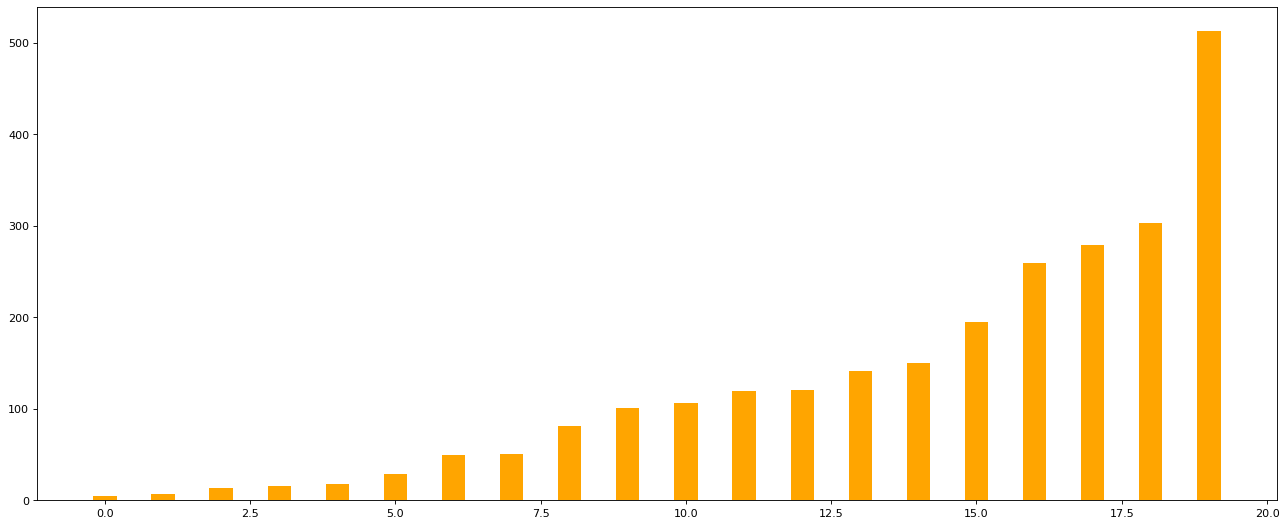

In [11]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
# plt.xticks(range(len(_x)), _x)
plt.xticks(range(len(_x)), _x)
plt.show()